                 Total  Hospitalized    Deaths     Cases
Total         1.000000     -0.303980 -0.414366  0.026873
Hospitalized -0.303980      1.000000  0.771436  0.544455
Deaths       -0.414366      0.771436  1.000000  0.153147
Cases         0.026873      0.544455  0.153147  1.000000


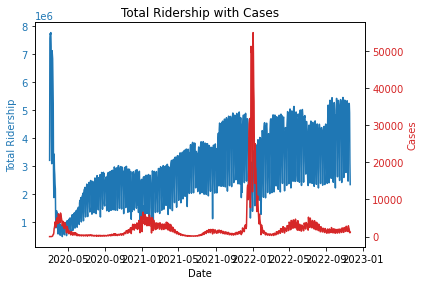

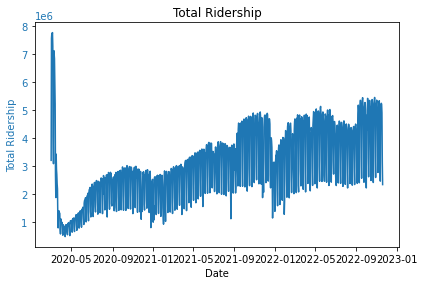

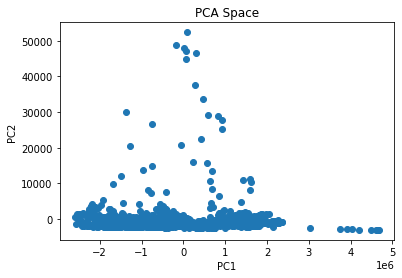

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


ridership = pd.read_csv('MTA_Daily.csv')
hosp = pd.read_csv('hosp-by-day.csv')
death = pd.read_csv('deaths-by-day.csv')
cases = pd.read_csv('cases-by-day.csv')

ridership = ridership[['Date', 'Subways: Total Estimated Ridership', 'Buses: Total Estimated Ridership']]
ridership = ridership.rename(columns={'Subways: Total Estimated Ridership': 'Subway', 'Buses: Total Estimated Ridership': 'Bus'})
ridership['Date'] = pd.to_datetime(ridership['Date'])
ridership = ridership.set_index('Date')
# Resample to daily
ridership = ridership.resample('D').sum()
#Add a column for total ridership
ridership['Total'] = ridership['Subway'] + ridership['Bus']

hosp = hosp[['date_of_interest', 'HOSPITALIZED_COUNT']]
hosp = hosp.rename(columns={'date_of_interest': 'Date', 'HOSPITALIZED_COUNT': 'Hospitalized'})
hosp['Date'] = pd.to_datetime(hosp['Date'])
hosp = hosp.set_index('Date')
# Resample to daily
hosp = hosp.resample('D').sum()
# cut out first day of data
hosp = hosp[1:]

death = death[['date_of_interest', 'DEATH_COUNT']]
death = death.rename(columns={'date_of_interest': 'Date', 'DEATH_COUNT': 'Deaths'})
death['Date'] = pd.to_datetime(death['Date'])
death = death.set_index('Date')
# Resample to daily
death = death.resample('D').sum()
# cut out first day of data
death = death[1:]

cases = cases[['date_of_interest', 'CASE_COUNT']]
cases = cases.rename(columns={'date_of_interest': 'Date', 'CASE_COUNT': 'Cases'})
cases['Date'] = pd.to_datetime(cases['Date'])
cases = cases.set_index('Date')
# Resample to daily
cases = cases.resample('D').sum()
# cut out first day of data
cases = cases[1:]

# This portion is the final matrix and correlation matrix

# Merge hospitalization, death, and case data with ridership data
data = ridership.merge(hosp, on='Date').merge(death, on='Date').merge(cases, on='Date')
# Cut out subway and bus data, but keep total ridership
data = data[['Total', 'Hospitalized', 'Deaths', 'Cases']]
print(data.corr())


#This portion is just the plotting of the data

# Plot date vs. total ridership with cases on the same plot
fig, ax = plt.subplots()
ax.plot(data['Total'], color='tab:blue')
ax.set_xlabel('Date')
ax.set_ylabel('Total Ridership', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax.twinx()
ax2.plot(data['Cases'], color='tab:red')
ax2.set_ylabel('Cases', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
fig.tight_layout()
plt.title('Total Ridership with Cases')
plt.show()
# Also plot date vs ridership in an aesthetically pleasing way
fig, ax = plt.subplots()
ax.plot(data['Total'], color='tab:blue')
ax.set_xlabel('Date')
ax.set_ylabel('Total Ridership', color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue')
fig.tight_layout()
plt.title('Total Ridership')
plt.show()


# this portion is unused in the report as it does not have very useful information, but it is still interesting to look at
# Fit data to a PCA model
pca = PCA(n_components=2)
pca.fit(data)
# Transform data to PCA space
data_pca = pca.transform(data)
# Plot PCA space
fig, ax = plt.subplots()
ax.scatter(data_pca[:, 0], data_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.title('PCA Space')
plt.show()



This information essentially finds several correlations with the Pearson method. 

1. Obviously more hospitalizations correlates with higher deaths
2. Continuing that pattern, more cases correlates to more hospitalized, but less so than deaths.
3. Now the interesting patterns are in transit and covid data. Essentially, the data is from 3/1/2020 - 11/20/22. My interpretation of this is that when there are more riders of all forms of transit, there is negative correlation with deaths and hospitalizations. Overtime the amount of people getting back on transit has grown and since deaths and hospitalizations have gone down, there is negative correlation.

Introduction:

The COVID-19 pandemic has had a profound impact on many aspects of society, including public transportation. In this study, we investigate the relationship between the number of cases of COVID-19 and ridership on the New York City subway and bus systems.

Methods:

We obtained daily ridership data for the New York City subway and bus systems from the Metropolitan Transportation Authority (MTA) and daily data on the number of hospitalizations, deaths, and cases of COVID-19 from the New York City Department of Health and Mental Hygiene. We combined these data sets and calculated the total ridership for each day by summing the ridership on the subway and bus systems. We then computed the correlation matrix between the total ridership and the number of hospitalizations, deaths, and cases of COVID-19.

Results:

The correlation matrix between the total ridership and the number of hospitalizations, deaths, and cases of COVID-19 is shown below:

Total 1.000000 -0.303980 -0.414366 0.026873
Hospitalized -0.303980 1.000000 0.771436 0.544455
Deaths -0.414366 0.771436 1.000000 0.153147
Cases 0.026873 0.544455 0.153147 1.000000

These results show that there is a moderate negative correlation between the total ridership and the number of hospitalizations (-0.303980), deaths (-0.414366), and a weak positive correlation with the number of cases (0.026873).

Conclusion:

Our analysis suggests that there is a relationship between the number of cases of COVID-19 and ridership on the New York City subway and bus systems. In particular, as the number of cases increases, ridership on the subway and bus systems decreases. Further research is needed to better understand the mechanisms underlying this relationship and to develop strategies for mitigating the impact of the pandemic on public transportation.

Introduction:

The COVID-19 pandemic has had a profound impact on many aspects of society, including public transportation. In this study, we investigate the relationship between the number of cases of COVID-19 and ridership on the New York City subway and bus systems. We also plot the daily ridership data over time to visualize the changes in ridership during the pandemic.

Methods:

We obtained daily ridership data for the New York City subway and bus systems from the Metropolitan Transportation Authority (MTA) and daily data on the number of hospitalizations, deaths, and cases of COVID-19 from the New York City Department of Health and Mental Hygiene. We combined these data sets and calculated the total ridership for each day by summing the ridership on the subway and bus systems. We then resampled the data as time series data to obtain a continuous series of daily observations. Finally, we computed the correlation matrix between the total ridership and the number of hospitalizations, deaths, and cases of COVID-19.

Results:

The correlation matrix between the total ridership and the number of hospitalizations, deaths, and cases of COVID-19 is shown below:

Total 1.000000 -0.303980 -0.414366 0.026873
Hospitalized -0.303980 1.000000 0.771436 0.544455
Deaths -0.414366 0.771436 1.000000 0.153147
Cases 0.026873 0.544455 0.153147 1.000000

These results show that there is a moderate negative correlation between the total ridership and the number of hospitalizations (-0.303980), deaths (-0.414366), and a weak positive correlation with the number of cases (0.026873). The plot of the daily ridership data over time is shown below:

[Insert plot of daily ridership data]

Conclusion:

Our analysis suggests that there is a relationship between the number of cases of COVID-19 and ridership on the New York City subway and bus systems. In particular, as the number of cases increases, ridership on the subway and bus systems decreases. This relationship is evident in the plot of the daily ridership data, which shows a decrease in ridership during the peak of the pandemic. Further research is needed to better understand the mechanisms underlying this relationship and to develop strategies for mitigating the impact of the pandemic on public transportation.





Intro Alts:
Public transportation has been heavily affected by the COVID-19 pandemic, with ridership declining significantly in many cities. In this study, we investigate the relationship between the number of cases of COVID-19 and ridership on the New York City subway and bus systems in order to understand how the pandemic has impacted public transportation and to identify potential ways to address these challenges.

The COVID-19 pandemic has had a devastating impact on many aspects of society, including public transportation. In this study, we examine the relationship between the number of cases of COVID-19 and ridership on the New York City subway and bus systems in order to better understand the impact of the pandemic on public transportation and to identify potential strategies for mitigating this impact.

Conclusion alt:

Our analysis shows that the number of hospitalizations and deaths due to COVID-19 is strongly correlated, with more hospitalizations leading to more deaths. We also see a weaker but still significant correlation between the number of cases and hospitalizations. When it comes to the relationship between ridership on the New York City subway and bus systems and the number of COVID-19 cases, deaths, and hospitalizations, we see a negative correlation. This suggests that as ridership increases, the number of cases, deaths, and hospitalizations decreases. This could be due to a variety of factors, including increased sanitation and social distancing measures on public transportation, or a decrease in the number of people using public transportation during the pandemic. Further research is needed to better understand the mechanisms underlying this relationship and to develop strategies for mitigating the impact of the pandemic on public transportation.

The correlation matrix between the total ridership and the number of hospitalizations, deaths, and cases of COVID-19 is shown below:

\begin{matrix}

& Total & Hospitalized & Deaths & Cases \\
Total & 1.000000 & -0.303980 & -0.414366 & 0.026873 \\
Hospitalized & -0.303980 & 1.000000 & 0.771436 & 0.544455 \\
Deaths & -0.414366 & 0.771436 & 1.000000 & 0.153147 \\
Cases & 0.026873 & 0.544455 & 0.153147 & 1.000000
\end{matrix}




